In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tikzplotlib

In [4]:
sts = ['data_12_4500']
data = pd.read_csv(sts[0] + ".csv", sep=",", header=0,index_col=['d','m','sigma','runs'])



minval = data.loc[:,'1':'30'].min(axis=1)
sigtonoise = data['data norm']/data['noise norm']

y = minval.to_numpy()
x = sigtonoise.to_numpy()
medx = []
medy = []
for idx,d in data.groupby(level=[0, 1,2]):
    medx.append(np.mean(sigtonoise[idx]))  
    medy.append(np.median(minval[idx]))
    
print(medy)
print(minval)

[1.0280362324419056e-06, 1.5482321820520732e-08, 2.9106898469276293e-07, 3.3285606307181496e-06, 2.8982501396197467e-05, 0.00033133315787437054, 0.0032380172343790146, 0.022764538566975495, 0.16385717401000138]
d   m     sigma         runs
12  4500  1.000000e-08  0       2.028433e-06
                        1       2.763986e-08
                        2       1.042700e-08
                        3       1.618572e-08
                        4       3.526123e-04
                                    ...     
          1.000000e+00  5       1.703467e-01
                        6       1.512768e-01
                        7       1.568340e-01
                        8       1.677155e-01
                        9       1.525166e-01
Length: 90, dtype: float64


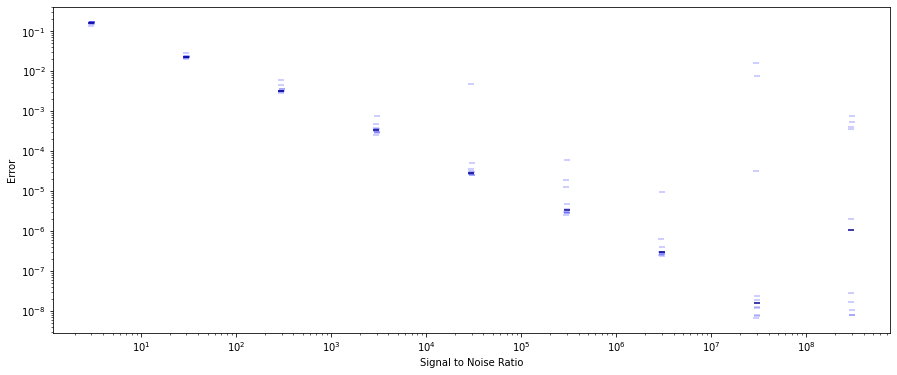

In [16]:
fig = plt.figure(figsize=(15, 6))
ax = plt.gca()
ax.scatter(x,y,marker='_', c='blue', alpha=0.25, edgecolors='none')
ax.scatter(medx,medy,marker='_', c='darkblue')
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('Signal to Noise Ratio')
plt.ylabel('Error')
tikzplotlib.save("graph.tex")
plt.show()